In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

Loading the Dataset

In [3]:
df = pd.read_csv("sale.csv")
df

,SALES,Price Each
0,5404.62,1700.00
1,7209.11,600.00
2,7329.06,11.95
3,7374.10,149.99
4,10993.50,11.95
...,...,...
962,3761.37,3.84
963,4301.34,150.00
964,1864.56,11.95
965,3576.80,389.99


In [15]:
df.describe()

,SALES,Price Each
count,967.000000,967.000000
mean,4053.377104,170.626412
std,2050.694132,311.571888
min,640.050000,2.990000
25%,2494.190000,11.950000
50%,3761.370000,14.950000
75%,5325.080000,150.000000
max,12001.000000,1700.000000


Building the Model

In [5]:
x = df.iloc[:, [1,0]].values

In [8]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters =i, init = "k-means++")
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    import warnings
    warnings.filterwarnings("ignore")

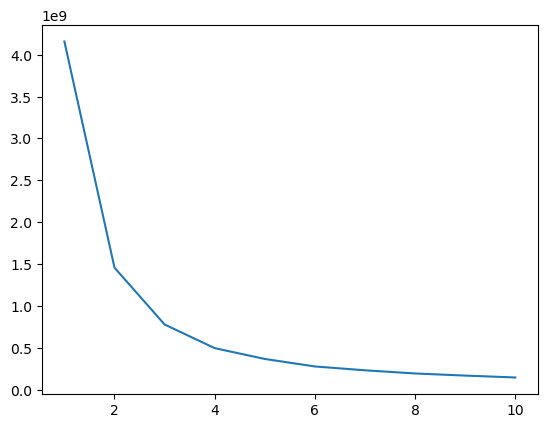

In [9]:
plt.plot(range(1,11), wcss)

In [10]:
model = KMeans(n_clusters = 4, init = "k-means++")

Vsualizing the Clusters Built by the Model

In [13]:
y_pred = kmeans.fit_predict(x)
y_pred[:19]

array([5, 0, 0, 0, 6, 5, 4, 5, 0, 4, 8, 8, 8, 0, 5, 4, 0, 6, 6])

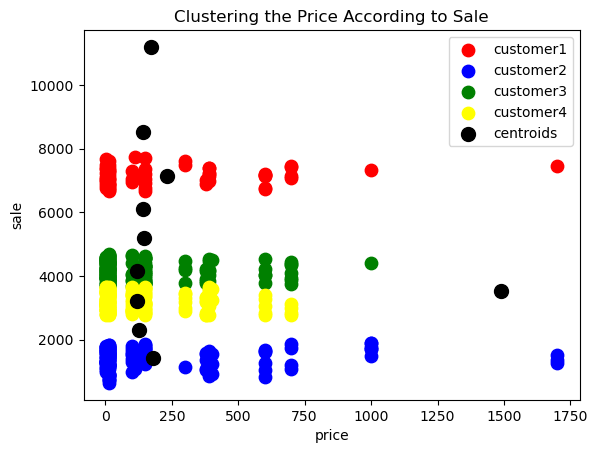

In [17]:
plt.scatter(x[y_pred ==0,0], x[y_pred == 0,1], s =80, c="red", label="customer1")
plt.scatter(x[y_pred ==1,0], x[y_pred == 1,1], s =80, c="blue", label="customer2")
plt.scatter(x[y_pred ==2,0], x[y_pred == 2,1], s =80, c="green", label="customer3")
plt.scatter(x[y_pred ==3,0], x[y_pred == 3,1], s =80, c="yellow", label="customer4")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = "black", label = "centroids")
plt.title("Clustering the Price According to Sale")
plt.xlabel("price")
plt.ylabel("sale")
plt.legend()
plt.show()